In [1]:
import os
import pandas as pd

# Specify the directory where your CSV files are located
folder_path = r'C:\Users\Abdullah\Downloads\Mahad'

# Create an empty list to store DataFrames from each file
dataframes = []

# Loop through the files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  # You can adjust the file extension as needed
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
            dataframes.append(df)  # Append the DataFrame to the list
        except Exception as e:
            print(f"Error reading {filename}: {e}")

if not dataframes:
    print("No valid CSV files found in the directory.")
else:
    # Concatenate all DataFrames into a single DataFrame
    df = pd.concat(dataframes, ignore_index=True)
    # Now, `combined_df` contains all the data from the CSV files in the folder.
print(df)

        agent_id                 time  longitude   latitude  regionID  \
0        5618978  2020-02-06T19-36-26  16.446863  48.232150   9220115   
1        5135292  2020-02-06T07-24-57  16.503970  48.240581   9220106   
2       11717588  2020-02-06T16-35-30  16.473968  48.275265   9210105   
3        4881059  2020-02-06T14-49-18  16.391468  48.268397   9210118   
4        6072788  2020-02-06T06-26-10  16.329754  48.218300   9170102   
...          ...                  ...        ...        ...       ...   
545577  55706095  2020-04-08T18-01-03  16.367782  48.240311   9200104   
545578  60877065  2020-04-08T19-49-23  16.414874  48.182230   9110102   
545579  60302078  2020-04-08T07-26-28  16.257932  48.152266   9230115   
545580  52579909  2020-04-08T17-18-36  16.376934  48.197153   9030103   
545581  64042507  2020-04-08T08-50-56  16.364595  48.193473   9040103   

        recentContacts  age  isPositive  
0                   19   67       False  
1                  329   60       False

In [2]:
import pandas as pd

# Ensure 'time' is in datetime format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H-%M-%S')

# 1. Drop all columns except "time"
df = df[['time']]

df['day'] = df['time'].dt.strftime('%Y-%m-%d')
df['day']=pd.to_datetime(df['day'])

# 2. Group by "month" and count the rows, then reset the index
df['calls'] = df.groupby('day')['day'].transform('count')


df = df.drop('time', axis=1)
df = df.drop_duplicates()
# Reset the index
df = df.reset_index(drop=True)
# Print the resulting DataFrame and the number of contacts
df.set_index('day',inplace=True)
print(df)



            calls
day              
2020-02-06    655
2020-02-07    687
2020-02-08    672
2020-02-09    717
2020-02-10    683
...           ...
2020-04-04  37909
2020-04-05  42918
2020-04-06  48421
2020-04-07  54581
2020-04-08  61387

[63 rows x 1 columns]


<AxesSubplot:xlabel='day'>

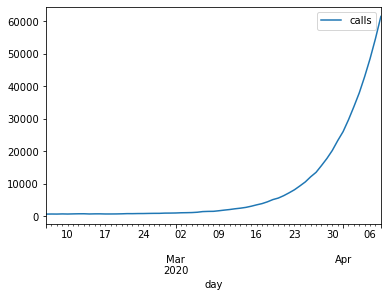

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df.plot()


In [4]:
test_result=adfuller(df['calls'])

In [5]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [6]:
adfuller_test(df['calls'])

ADF Test Statistic : -3.389211871307228
p-value : 0.011332182106999851
#Lags Used : 7
Number of Observations Used : 55
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


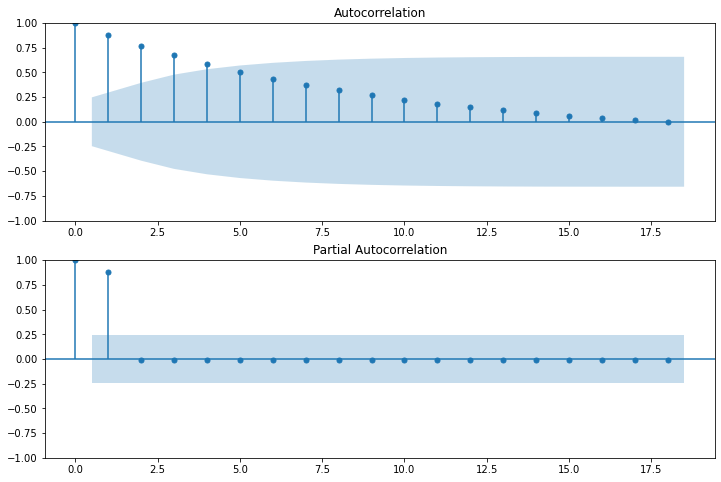

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['calls'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['calls'], ax=ax2)  # Set lags to a smaller value
## i = 1
## 
## stationary data has 4 components, seasonality, cycles, noise
#p=0.5 or 1
#q-0 or 1
#d

In [8]:
##UNi variate analysis ARIMA model
import statsmodels.api as sm

In [9]:
model = sm.tsa.arima.ARIMA(df['calls'], order=(1, 1, 0), seasonal_order=(0, 0, 0, 0))
result = model.fit()


C:\Users\Abdullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Abdullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Abdullah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Abdullah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  calls   No. Observations:                   63
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -433.720
Date:                Mon, 30 Oct 2023   AIC                            871.440
Time:                        16:17:21   BIC                            875.694
Sample:                    02-06-2020   HQIC                           873.110
                         - 04-08-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.014     71.247      0.000       0.972       1.027
sigma2      6.744e+04   1.23e+04      5.474      0.000    4.33e+04    9.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):                33.33
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):              55.91   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Abdullah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='day'>

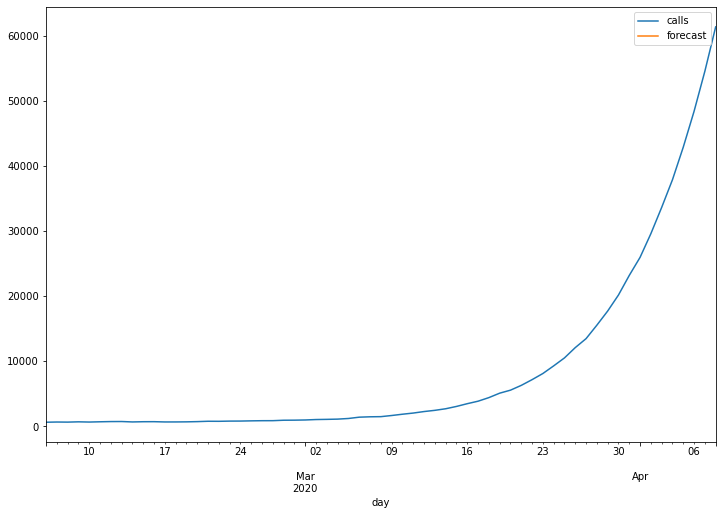

In [11]:
df['forecast']=result.predict(start=90,end=110,dynamic=True)
df[['calls','forecast']].plot(figsize=(12,8))